In [3]:
# Importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4]
print('Prediction evidence:\n', X.head())
print('\nFinal Target:\n', y.head())


Prediction evidence:
    Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

Final Target:
 0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


# Data Pre-Processing

In [5]:
# Conversion of variables into arrays
X = X.values
y = y.values


In [6]:
# Dataset splitting into training and test datasets(70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Fitting of Naive Bayes Algorithm to the Training Dataset

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

<Axes: >

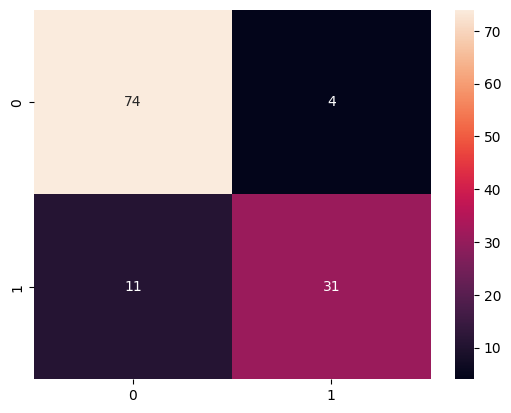

In [9]:
# Prediction of the test dataset outcomes
y_pred = classifier.predict(X_test)

# Constructing the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


/tmp/ipykernel_10181/2196677976.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_dataset[y_dataset == v, 0], X_dataset[y_dataset == v, 1],


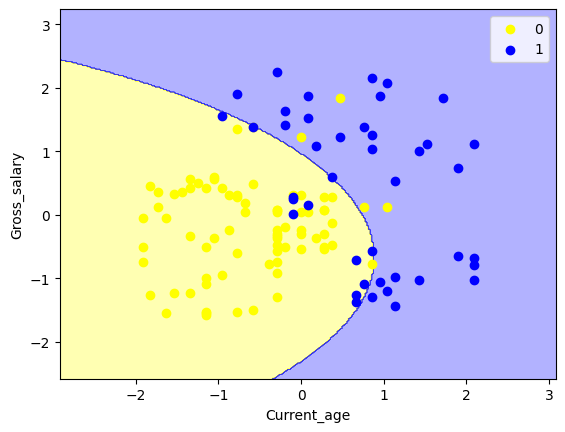

In [10]:
# Visualizing the test dataset results

from matplotlib.colors import ListedColormap
X_dataset, y_dataset = X_test, y_test

# Create a meshgrid
X1, X2 = np.meshgrid(np.arange(start=X_dataset[:, 0].min() - 1, stop=X_dataset[:, 0].max() + 1, step=0.02),
                     np.arange(start=X_dataset[:, 1].min() - 1, stop=X_dataset[:, 1].max() + 1, step=0.02))

# Use the classifier to make predictions on the meshgrid points
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a ListedColormap for contour plot
colors = ListedColormap(('yellow', 'blue'))

# Plot the contour plot
plt.contourf(X1, X2, Z, alpha=0.3, cmap=colors)

# Plot the data points
for i, v in enumerate(np.unique(y_dataset)):
    plt.scatter(X_dataset[y_dataset == v, 0], X_dataset[y_dataset == v, 1],
                c=colors(i), label=str(v))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Current_age')
plt.ylabel('Gross_salary')
plt.legend()
plt.show()


# Multinomial NB

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [12]:
# Load the 20 newsgroups dataset (a dataset of newsgroup documents)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)


In [14]:
# Convert text data to binary feature vectors using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [15]:
# Instantiate the Multinomial Naive Bayes classifier
clf = MultinomialNB()


In [16]:
# Train the classifier
clf.fit(X_train_counts, y_train)


MultinomialNB()

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test_counts)


In [18]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [19]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6395225464190981
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.13      0.23       151
           1       0.56      0.67      0.61       202
           2       0.86      0.13      0.22       195
           3       0.46      0.84      0.60       183
           4       0.92      0.58      0.71       205
           5       0.81      0.80      0.80       215
           6       0.89      0.61      0.72       193
           7       0.86      0.69      0.76       196
           8       0.50      0.64      0.56       168
           9       0.96      0.77      0.85       211
          10       0.91      0.85      0.88       198
          11       0.54      0.81      0.65       201
          12       0.82      0.51      0.63       202
          13       0.81      0.75      0.78       194
          14       0.76      0.74      0.75       189
          15       0.29      0.96      0.45       202
          16       0.75      

# BernoulliNB

In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report


In [21]:
# Load the 20 newsgroups dataset (a dataset of newsgroup documents)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)


In [23]:
# Convert text data to binary feature vectors using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [24]:
# Instantiate the Bernoulli Naive Bayes classifier
clf = BernoulliNB()


In [25]:
# Train the classifier
clf.fit(X_train_counts, y_train)


BernoulliNB()

In [26]:
# Make predictions on the test set
y_pred = clf.predict(X_test_counts)


In [27]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.45305039787798407
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       151
           1       0.66      0.23      0.34       202
           2       0.70      0.04      0.07       195
           3       0.33      0.80      0.47       183
           4       0.87      0.51      0.64       205
           5       0.95      0.41      0.57       215
           6       0.89      0.65      0.75       193
           7       0.65      0.53      0.59       196
           8       0.10      0.93      0.19       168
           9       0.90      0.65      0.76       211
          10       0.98      0.61      0.75       198
          11       0.78      0.50      0.61       201
          12       0.74      0.53      0.62       202
          13       0.95      0.43      0.60       194
          14       0.87      0.44      0.58       189
          15       0.44      0.59      0.50       202
          16       0.76     